**Equipo:**

**Karla De La Cruz Valencia A01738420**

**Luis Antonio Salinas Gonzalez A01735375**

# **Reto: Interpret K-means Clusters on Credit Card Dataset**

Importamos las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Cargamos el archivo con el dataframe

In [ ]:
df = pd.read_csv("/content/CC GENERAL.csv")
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Para ver las estadisticas de las columnas

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Limpieza de datos

In [ ]:
# Valores nulos antes de limpueza
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Eliminamos filas con NaN
df = df.dropna()

In [ ]:
# Verificamos si ya no hay NaNs
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Hipotesis: existen 2 tipos de clientes, unos con saldo alto y muchas compras, y otros con saldo bajo y pocas compras**

Seleccionamos las 2 columnas que se trabajaran para la hipotesis

In [ ]:
features = df[["BALANCE", "PURCHASES"]].copy()

Grafico de dispersion original

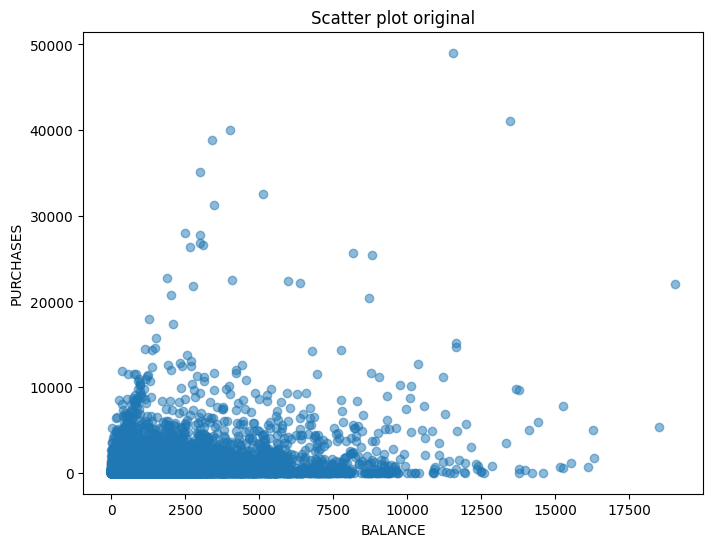

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(features["BALANCE"], features["PURCHASES"], alpha=0.5)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.title("Scatter plot original")
plt.show()

Escalamos los datos

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Se entrena a Kmeans con 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

Graficamos los resultados con colores por cluster

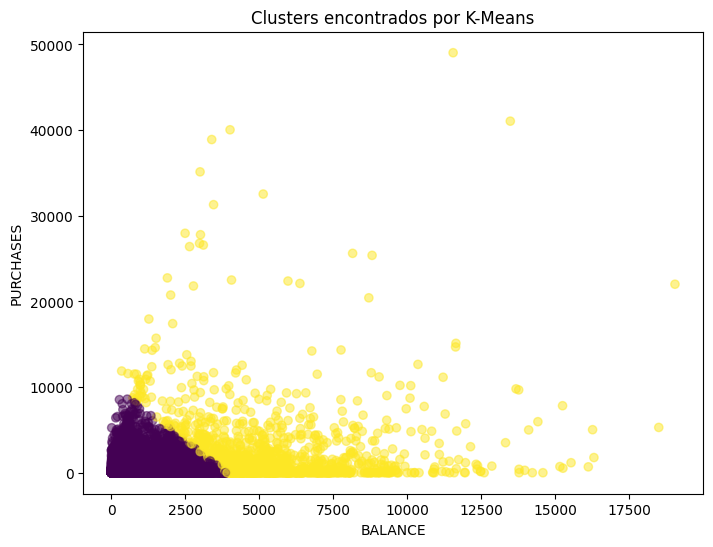

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(features["BALANCE"], features["PURCHASES"], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.title("Clusters encontrados por K-Means")
plt.show()

Imprimimos etiquetas y centroides

In [ ]:
print("Etiquetas asignadas por KMeans:")
print(labels)

print("\nCentroides:")
print(kmeans.cluster_centers_)

Etiquetas asignadas por KMeans:
[0 0 0 ... 0 0 0]

Centroides:
[[-0.32926071 -0.12590586]
 [ 1.91856179  0.73363804]]


Conclusión:

Al aplicar K-Means con 2 clusters sobre las columnas BALANCE y PURCHASES, se identificaron dos grupos de clientes.
Si bien ambos grupos se superponen en ciertas zonas del gráfico, se observa que uno de ellos concentra la mayoría de los clientes con balances y compras bajas, mientras que el otro contiene mayor dispersión, incluyendo clientes con balances o compras significativamente más altas.

Por lo tanto, la hipótesis se cumple parcialmente: sí existen al menos dos perfiles financieros distintos, pero no están tan claramente separados como se anticipaba. Esto puede deberse a que la mayoría de los clientes tienen un comportamiento financiero similar y solo una minoría se comporta diferente.